<a href="https://colab.research.google.com/github/gfitez/Phys206L_FinalProject/blob/main/FinalProject_Fitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Grant Fitez
#Final Project
#12/1/20


#This cell will import the data and install the necessary modules.
!git clone https://github.com/neojdl/Phys_206.git
!pip install shap

Cloning into 'Phys_206'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
     |████████████████████████████████| 327kB 10.1MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463909 sha256=4e4e2601956d99b394c083ab22007108643e203fbb883edd18b4a24a1a8657f3
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
#This cell will import the modules and set up the data frame.
#This encompasses parts 1-3 of the life cycle of knowledge mining.

#1. Idea: The hypothesis for this project is that the integrated profile of 
#an object in space as well as the signal noise ratio vs. dispersion will be able
#provide evidence as to whether a given signal is a pulsar or not. 

#2. Collect Data: Data is from the UIC machine learning repository. 

#3. Cleaning data: The data was already fairly clean. All we had to do was add
#headers to the csv file and split into train and test, removing the signal class
#from the training data. This is done in the lines below.

#Import modules
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import confusion_matrix


"""
Mean_(IP) - The mean of the Integrated Profile
STD_(IP) - The standard deviation of the Integrated Profile
ExcessK_(IP) - The excess kurtosis viz. (Kurtosis - 3) of the Integrated Profile 
Skew_(IP) - The skew of the Integrated Profile
Mean_(DM-SNR) - The mean of the DM-SNR curve
STD_(DM-SNR) - The standard deviation of the DM-SNR curve
ExcessK_(DM-SNR) - The excess kurtosis viz. (Kurtosis - 3) of the DM-SNR curve
Skew_(DM-SNR) - The skew of the DM-SNR curve
Class - 0 is not a pulsar, 1 is a pulsar
"""

df = pd.read_csv('Phys_206/HTRU_2.csv')

#Split 30% train, 70% test
train, test = train_test_split(df, test_size=0.3)


#Make unlabeled data so the model can't "cheat"
unlabeledTrain=train.copy()
del unlabeledTrain['Class']
unlabeledTest=test.copy()
del unlabeledTest['Class']



knn
Accuracy score:0.9735567970204841


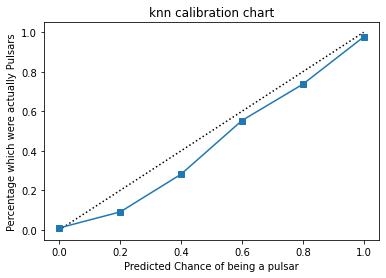

[[4818   49]
 [  93  410]]


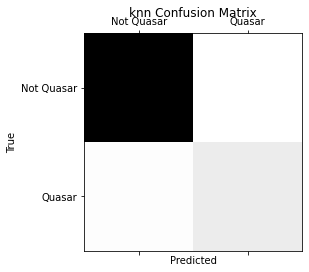

#########################################
#########################################
forest
Accuracy score:0.9808193668528864


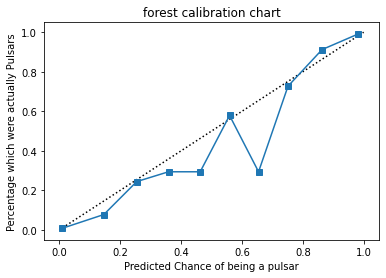

[[4830   37]
 [  66  437]]


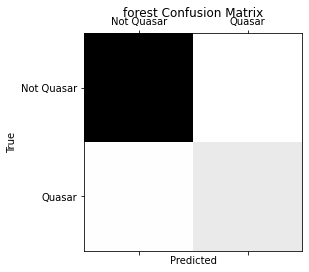

#########################################
#########################################
gbc
Accuracy score:0.9791433891992551


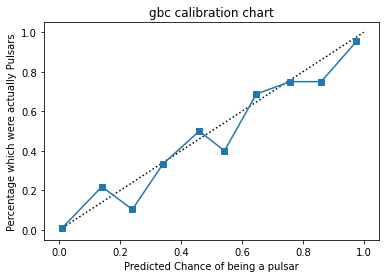

[[4821   46]
 [  66  437]]


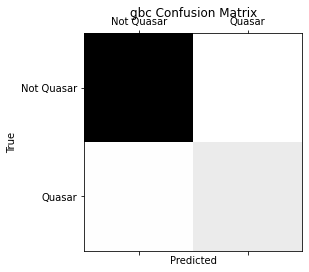

#########################################
#########################################
mlp
Accuracy score:0.978584729981378


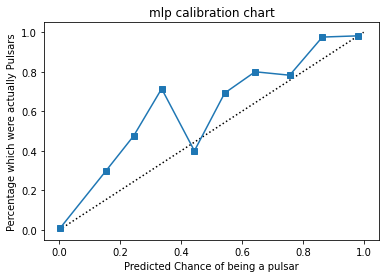

[[4847   20]
 [  95  408]]


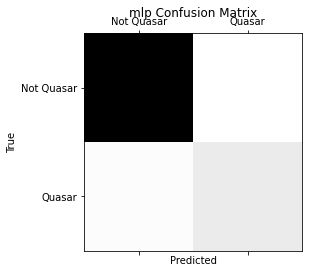

#########################################
#########################################
gnb
Accuracy score:0.9443202979515829


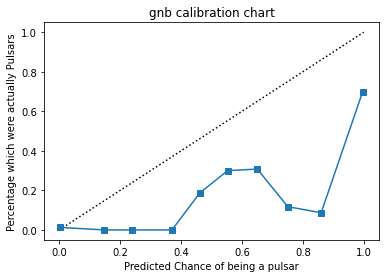

[[4631  236]
 [  63  440]]


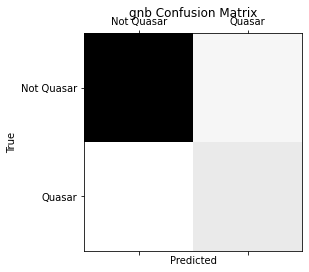

#########################################
#########################################


In [ ]:
#This cell will try modeling the data with 5 different potential models. It will
#evaluate each models accuracy, calibration and plot a confusion matrix. Based
#on this we should be able to choose the best model for the data. 

#This cell encompasses parts 4 and 5 of the life cycle of knowledge mining.

#4. Model: The actual creation of each model is taken care of by sklearn. This 
#cell will call the model creation function and train each model for 5 epochs.

#5. Evaluation: Each model will be evaluated by an accuracy score, a calibration 
#chart, and a confusion matrix.

#Conclusion: All models have virtually identical confusion matrices. All models
#except for Gaussian Naive Bayes have pretty good calibration charts. With this
#being the case, random forest seems to be the best since it has the highest
#accuracy score.



#Try a number of different classifiers
knn=KNeighborsClassifier()
forest=RandomForestClassifier()
gbc=GradientBoostingClassifier()

#I played around with the settings of the MLP classifier and 50 nodes
#in one hidden layer with an adaptive learning rate seems to be the best for accuracy.
mlp=MLPClassifier(learning_rate="adaptive", hidden_layer_sizes=(50))
gnb=GaussianNB()

models={"knn":knn,"forest":forest,"gbc":gbc,"mlp":mlp,"gnb":gnb}

#Loop through each model, train it for 5 epochs, than evaluate its accuracy,
#calibration, and confusion matrix
for model in models:

  #train for 5 epochs
  for i in range(5):
    models[model].fit(unlabeledTrain,train["Class"])
  print(model)

  #Generate accuracy score
  predicted = models[model].predict(unlabeledTest)
  print("Accuracy score:"+str(accuracy_score(test[["Class"]],predicted)))


  #Get data for calibration graph
  prob_pos = models[model].predict_proba(unlabeledTest)[:, 1] 

  # construct the calibration curve
  fraction_of_positives, mean_predicted_value = calibration_curve(test['Class'], prob_pos, n_bins=10) 
  # plot the calibration curve
  plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
  plt.plot(mean_predicted_value, fraction_of_positives, "s-")
  plt.xlabel("Predicted Chance of being a pulsar")
  plt.ylabel("Percentage which were actually Pulsars")
  plt.title(model+" calibration chart")
  plt.show()


  #Generate confusion matrix
  cm = confusion_matrix(test["Class"], predicted)
  #print raw numbers
  print(cm)
  #format and label matrix 
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap="binary")
  plt.title('Confusion matrix for decision tree')
  ax.set_xticklabels([''] + ["Not Quasar","Quasar"])
  ax.set_yticklabels([''] + ["Not Quasar","Quasar"])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(model+" Confusion Matrix")
  plt.imshow(cm, cmap='binary')
  plt.show()
  print("#########################################\n#########################################")






Text(0.5, 1.0, 'Accuracy vs. Number of estimators')

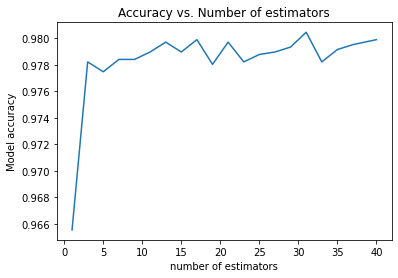

In [ ]:
#This cell will calculate the accuracy score as a function
#of the number of estimators in the random forest trained

#This cell encompasses step 4: Model. It creates a chart
#to help predict how the model should be tuned.

#Conclusion: Random forest reaches nearly its highest accuracy even using only 
#10 or so estimators. There is no reason to increase n_estimators to be more
#than the default.


#Store the accuracy scores
accuracy=[]

#generate array of n_estimators to test
n_estimators=np.linspace(1,40,20,dtype=int)


for i in n_estimators:
    #Make classifier
    forest=RandomForestClassifier(n_estimators=i)
    forest.fit(unlabeledTrain,train["Class"])

    #Log accuracy for n estimators
    predicted = forest.predict(unlabeledTest)
    accuracy.append(accuracy_score(test[["Class"]],predicted))


#format and plot graph
plt.plot(n_estimators,accuracy)
#plt.xticks(n_classifiers)
plt.xlabel("number of estimators")
plt.ylabel("Model accuracy")
plt.title("Accuracy vs. Number of estimators")

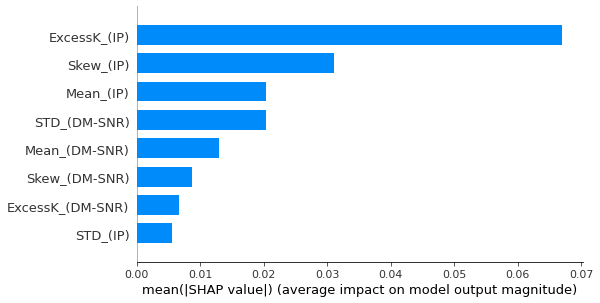

In [ ]:
_#This cell will generate a random forest classifier, train it for 5 epochs,
#and then plot the shaply results.

#This cell encompasses step 6: Knowledge. It provides a chart of which features
#are the most important for determining whether or not a signal is from a pulsar

#Conclusion: Integrated profile is the most important. Excess kurtosis and skew
#are the most important features of the integrated profile.

forest=RandomForestClassifier()
for i in range(5):
    forest.fit(unlabeledTrain,train["Class"])


shap.initjs() 

#Generate a rodnom sample of data to analyze for best lead predictors
#I can't do all the data because that takes to long
visualizeData=unlabeledTrain.sample(n=250, random_state=20)

#Generate the explainer and get its values
explainer = shap.TreeExplainer(forest, random_state=13) 
shap_values = explainer.shap_values(visualizeData) 

#Plot the explainer results
shap.summary_plot(shap_values[0], visualizeData, plot_type = 'bar',title="Random Forest Explainer")





In [ ]:
#This cell will further analyze the importance of each independent variable.
#It will generate a new model based on only the two most important features and 
#a model based on everything but the two most important features and compare 
#their accuracies.

#This cell encompasses step 6: knowledge. It further analyzes how important each
#feature of the data is by analyzing what happens if some features are removed 
#from the model.


#Make a dataframe with only the top 2 datapoints
smallDf = pd.read_csv('Phys_206/HTRU_2.csv')
del smallDf["STD_(DM-SNR)"]
del smallDf["ExcessK_(DM-SNR)"]
del smallDf["Skew_(DM-SNR)"]
del smallDf["STD_(IP)"]
del smallDf["Mean_(IP)"]
del smallDf["Mean_(DM-SNR)"]

smallTrain, smallTest = train_test_split(smallDf, test_size=0.3)


#Make unlabeled data so the model can't "cheat"
smallUnlabeledTrain=smallTrain.copy()
del smallUnlabeledTrain['Class']
smallUnlabeledTest=smallTest.copy()
del smallUnlabeledTest['Class']

#Train model
smallForest=RandomForestClassifier()
for i in range(5):
    smallForest.fit(smallUnlabeledTrain,smallTrain["Class"])
#Generate accuracy score
predicted = smallForest.predict(smallUnlabeledTest)
print("Accuracy with only two most important features:"+str(accuracy_score(smallTest[["Class"]],predicted)))


##########################################################################
#Now do the same thing for everything but those 2 data points


smallDf = pd.read_csv('Phys_206/HTRU_2.csv')
del smallDf["Skew_(IP)"]
del smallDf["ExcessK_(IP)"]
smallTrain, smallTest = train_test_split(smallDf, test_size=0.3, random_state=4)


#Make unlabeled data so the model can't "cheat"
smallUnlabeledTrain=smallTrain.copy()
del smallUnlabeledTrain['Class']
smallUnlabeledTest=smallTest.copy()
del smallUnlabeledTest['Class']

#Train model
smallForest=RandomForestClassifier()
for i in range(5):
    smallForest.fit(smallUnlabeledTrain,smallTrain["Class"])
#Generate accuracy score
predicted = smallForest.predict(smallUnlabeledTest)
print("Accuracy without two most important features:"+str(accuracy_score(smallTest[["Class"]],predicted)))



Accuracy with only two most important features:0.9787709497206704
Accuracy without two most important features:0.974487895716946


In [ ]:
#This cell will compare two different indepedendent variables and generate an
#array of model predictions. This is used to generate the meshgrid in the next 
#cell.

#This cell encompasses step 5: evaluation and step 6:knowledge. It provides data
#for a visualization of the model and the dataset.

#Number of rows and columns of testPoints
N_SAMPLES=80


#Index of the two axis to compare in the dataframe columns
xAxisIndex=2
yAxisIndex=3
xAxis=df.columns[xAxisIndex]
yAxis=df.columns[yAxisIndex]

print(xAxis+" "+yAxis)


#generate range of points to test
minX=df[[xAxis]].min()[0]
maxX=df[[xAxis]].max()[0]
minY=df[[yAxis]].min()[0]
maxY=df[[yAxis]].max()[0]

#Manually override the min and max to zoom in on a certain area
"""minX=0.5
maxX=1.5
minY=-2
maxY=6"""

#Make a dataframe with only the top 2 datapoints
smallDf = pd.read_csv('Phys_206/HTRU_2.csv')
for column in smallDf.columns:
  if column!=xAxis and column!=yAxis and column!="Class":
    del smallDf[column]


smallTrain, smallTest = train_test_split(smallDf, test_size=0.3, random_state=4)

#Make unlabeled data so the model can't "cheat"
smallUnlabeledTrain=smallTrain.copy()
del smallUnlabeledTrain['Class']
smallUnlabeledTest=smallTest.copy()
del smallUnlabeledTest['Class']

#Train model
smallForest=RandomForestClassifier()
for i in range(5):
    smallForest.fit(smallUnlabeledTrain,smallTrain["Class"])



#generate grid of points to test
xValues=np.linspace(minX,maxX,N_SAMPLES)
yValues=np.linspace(minY,maxY,N_SAMPLES)
output=[]


for yValue in yValues:
  output.append([])
  for xValue in xValues:
    testPoint=[]
    testPoint.append(xValue)
    testPoint.append(yValue)
    
    #test that ponit
    output[len(output)-1].append(smallForest.predict([testPoint])[0])

ExcessK_(IP) Skew_(IP)


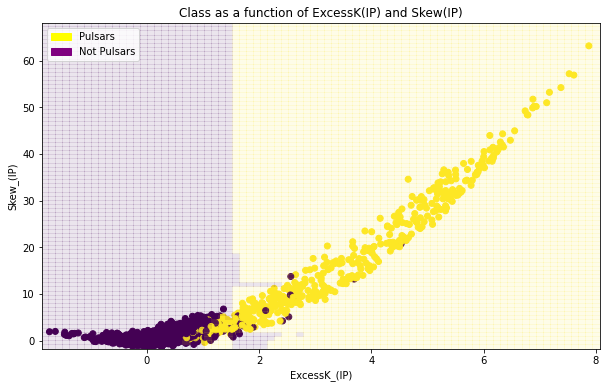

In [ ]:
#In this cell the model results are plotted as a mesh background
#and the data points are plotted on top of that

#This cell encompasses step 5: evaluation and step 6: knowledge. It provides a
#data for a visualization of the model and the dataset. 


#Plot data points
plt.scatter(test[[xAxis]], test[[yAxis]],c=test[["Class"]].to_numpy())

#plot model results
plt.pcolormesh(xValues,yValues,output,alpha=0.1)

#format chart
plt.xlim(minX,maxX)
plt.ylim(minY,maxY)
plt.xlabel("ExcessK_(IP)")
plt.ylabel("Skew_(IP)")
plt.title("Class as a function of ExcessK(IP) and Skew(IP)")

#add legend
pulsars = mpatches.Patch(color='yellow', label='Pulsars')
notPulsars = mpatches.Patch(color='purple', label='Not Pulsars')
plt.legend(handles=[pulsars,notPulsars])

#show chart
fig = plt.gcf()
fig.set_size_inches(10, 6)


In [ ]:
#Calculate the accuracy of a simple model that just checks if
#ExcessK_(IP)>1 to determine if it is a pulsar

#This cell encompasses step 6: knowledge. It provides a simple
#rule of thumb to calculate if something is a pulsar or not
#without needing a complex computer model.

correct=0;

for index, row in df.iterrows():
  if row["ExcessK_(IP)"]>1 and row["Class"]==1:
    correct+=1
  if row["ExcessK_(IP)"]<1 and row["Class"]==0:
    correct+=1

print(correct/df.count()[0])



0.9736842105263158
